In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Sentiment Analysis for Mental Health.csv')

In [ ]:
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.tail()

,statement,status
53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety
53042,I have really bad door anxiety! It's not about...,Anxiety


In [ ]:
df.shape

(53043, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53043 non-null  object
dtypes: object(2)
memory usage: 828.9+ KB


In [ ]:
df['status'].value_counts()

,count
status,
Normal,16351
Depression,15404
Suicidal,10653
Anxiety,3888
Bipolar,2877
Stress,2669
Personality disorder,1201


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(51093, 2)

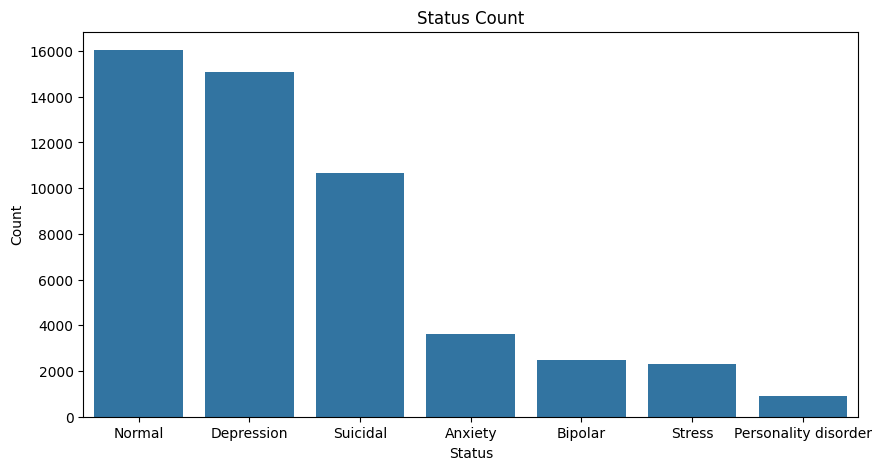

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['status'].value_counts().index, y=df['status'].value_counts().values)
plt.title('Status Count')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

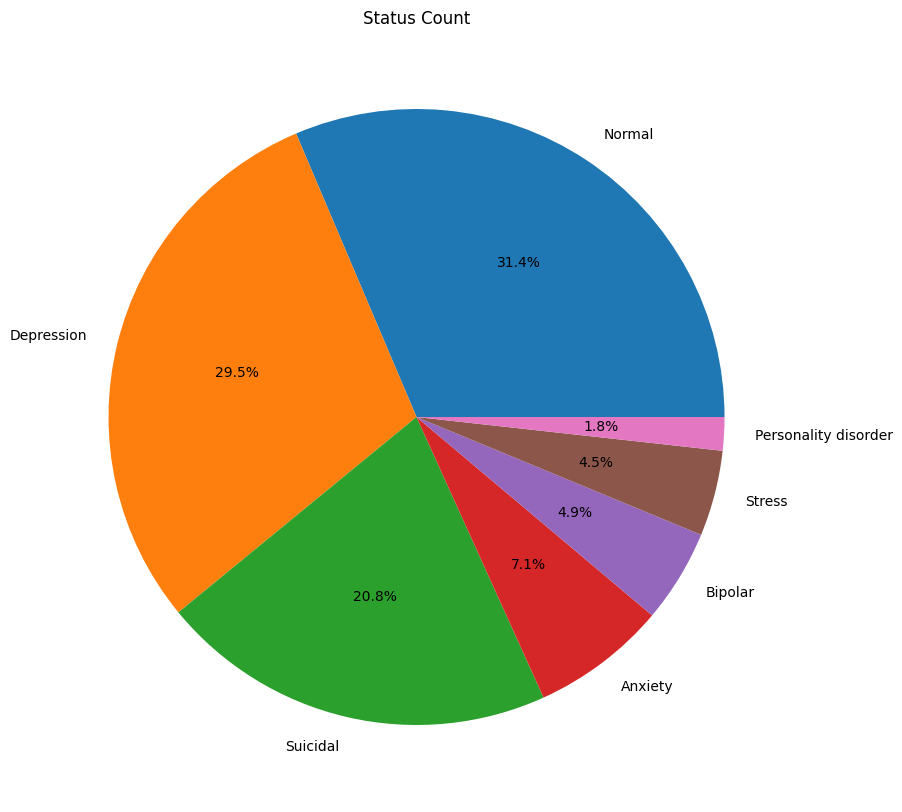

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(df['status'].value_counts(), labels=df['status'].value_counts().index, autopct='%1.1f%%')
plt.title('Status Count')
plt.show()

# ***Text Processing***

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

In [ ]:
df['statement'] = df['statement'].apply(clean_text)
df['statement'].head()

,statement
0,oh my gosh
1,trouble sleeping confused mind restless heart ...
2,all wrong back off dear forward doubt stay in ...
3,ive shifted my focus to something else but im ...
4,im restless and restless its been a month now ...


In [ ]:
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

In [ ]:
df['statement'] = df['statement'].apply(tokenize_text)
df['statement'].head()

,statement
0,"[oh, my, gosh]"
1,"[trouble, sleeping, confused, mind, restless, ..."
2,"[all, wrong, back, off, dear, forward, doubt, ..."
3,"[ive, shifted, my, focus, to, something, else,..."
4,"[im, restless, and, restless, its, been, a, mo..."


In [ ]:
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

In [ ]:
df['statement'] = df['statement'].apply(remove_stopwords)
df['statement'].head()

,statement
0,"[oh, gosh]"
1,"[trouble, sleeping, confused, mind, restless, ..."
2,"[wrong, back, dear, forward, doubt, stay, rest..."
3,"[ive, shifted, focus, something, else, im, sti..."
4,"[im, restless, restless, month, boy, mean]"


In [ ]:
def join_tokens(tokens):
    text = ' '.join(tokens)
    return text

In [ ]:
df['statement'] = df['statement'].apply(join_tokens)
df['statement'].head()

,statement
0,oh gosh
1,trouble sleeping confused mind restless heart ...
2,wrong back dear forward doubt stay restless re...
3,ive shifted focus something else im still worried
4,im restless restless month boy mean


In [ ]:
df.columns

Index(['statement', 'status'], dtype='object')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])

In [ ]:
tdf = TfidfVectorizer()
x = tdf.fit_transform(df['statement'])
y = df['status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
log_pred = logreg.predict(X_test)

In [ ]:
cfm = confusion_matrix(y_test, log_pred)
print(cfm)
arr = accuracy_score(y_test, log_pred)
print(arr)
cls = classification_report(y_test, log_pred)
print(cls)

[[ 559    8   47   82    3   26    2]
 [  21  350   60   55    3   19   10]
 [  35   25 2137  155    8   31  559]
 [  11    3   82 3113    0   18   44]
 [   6    4   48   40   62   12    7]
 [  40   14   82  137    2  173   17]
 [   0    2  581  210    0    2 1314]]
0.7542812408259125
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       727
           1       0.86      0.68      0.76       518
           2       0.70      0.72      0.71      2950
           3       0.82      0.95      0.88      3271
           4       0.79      0.35      0.48       179
           5       0.62      0.37      0.46       465
           6       0.67      0.62      0.65      2109

    accuracy                           0.75     10219
   macro avg       0.76      0.64      0.68     10219
weighted avg       0.75      0.75      0.75     10219



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [ ]:
cfm = confusion_matrix(y_test, log_pred)
print(cfm)
arr = accuracy_score(y_test, log_pred)
print(arr)
cls = classification_report(y_test, log_pred)
print(cls)

[[ 559    8   47   82    3   26    2]
 [  21  350   60   55    3   19   10]
 [  35   25 2137  155    8   31  559]
 [  11    3   82 3113    0   18   44]
 [   6    4   48   40   62   12    7]
 [  40   14   82  137    2  173   17]
 [   0    2  581  210    0    2 1314]]
0.7542812408259125
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       727
           1       0.86      0.68      0.76       518
           2       0.70      0.72      0.71      2950
           3       0.82      0.95      0.88      3271
           4       0.79      0.35      0.48       179
           5       0.62      0.37      0.46       465
           6       0.67      0.62      0.65      2109

    accuracy                           0.75     10219
   macro avg       0.76      0.64      0.68     10219
weighted avg       0.75      0.75      0.75     10219

